Twitter Sentiment Analysis

In [534]:
#Installing all my packages that are needed to complete this program. 
! pip install tweepy
! pip install textblob
! pip install dataset
! pip install twitter
from textblob import TextBlob 
import twitter
import tweepy
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
import dataset
import pyspark 
import pandas as pd
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import itertools
import collections
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [53]:
#My registered twitter credentials for the app
access_token = "259009016-b06F8cGLjDbgloH6Iyv134OimmCwzAqYZO4fHzge"
access_secret = "d2pPf8r3nw4XQieyha4xJE3MvAsUVX3cao7gdxUaWW9Xv"
consumer_key = "h4mTRruAF229RVdI2jdQ4TxaS"
consumer_secret = "Tfmwho9cqldXuuf11hLap5XC4q30BPXgPo2q4RO7XBh1x1EjBJ"

 
#pass twitter credentials to tweepy
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)
 

In [490]:
#Searching for tweets relating to climate change starting from March 1st, 2020. We are filtering out retweets, since that is redundant data. 
#Please also note that the tweets that I am retreiving are english tweets only. 
#We are obtaining 100,000 tweets relating to climate change starting from March 1, 2020
search_term = "#climate+change -filter:retweets"
tweets = tweepy.Cursor(api.search, q=search_term, lang="en", since='2020-03-01').items(1000000)

#Storing them in a list
Climate_Change_Tweets_Raw = [tweet.text for tweet in tweets]

In [548]:
#Cleaning the dataset and removing any links - this does not influence the sentiment and further clouds the dataset with unnecessary characters
Climate_Change_Tweets_Cleaned = [' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", tweet).split()) for tweet in Climate_Change_Tweets_Raw] 

In [549]:
Climate_Change_Tweets_Cleaned

['True Climate change is an existential threat all decarbonization options should be on the table for context',
 'Mr Macklem will have to address the bank s 10 billion corporate bond purchase program Many companies in need ar',
 'Human responses to climate and ecosystem change in ancient Arabia',
 'A make or break moment for our action on Climate ActOnClimate',
 'Even so CO2 levels are still going up The efforts will need to be titanic even bigger than the on',
 'New Scientist Climate change has already made parts of the world too hot for humans',
 'TOMORROW Don t forget to register at 1pm ET as panelists discuss the consideration of climate change effects und',
 'Scientists pondering forests of the future meeting challenges of climate change in Minnesota Climate',
 'New from me Incitec Pivot avoids multi million dollar penalty after greenhouse gas emissions dump',
 'Climate Climate Change ClimateChange Environment Modelling Crisis Models Permafrost Science Carbon Ice S',
 'A Rogue Nat

In [550]:
#We need to make the tweets in all lower case - this is because 
# if there are two of the same words but one is in upper case and the other in lower case
# then they are read/classified as two different words
# Therefore, in the clearning process, we must make all the tweets lower case

Visulization = [tweet.lower().split() for tweet in Climate_Change_Tweets_Cleaned]

In [551]:
#Downloading stopwords to aid me in cleaning out the tweets so I can visuzlize the tweets better. This package is the Natural Language Toolkit - its a collection of common words that are not useful in data analysis 
nltk.download('stopwords')
StopWords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rashijammi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [552]:
count_of_words = [[word for word in tweet_words if not word in StopWords]
              for tweet_words in Visulization]

word_count_Climate_Change = list(itertools.chain(*count_of_words))

count = collections.Counter(word_count_Climate_Change)

In [554]:
#With the use of Textblob, i will determine the sentiment of each tweet. This concept is further defined in my write up. 
import numpy as np

# Creating my training data
Sentiment_Value_Climate_Change = [[tweet.sentiment.polarity, str(tweet)] for tweet in [TextBlob(tweet) for tweet in Climate_Change_Tweets_Cleaned]]

#Here I am assignin the lables "Positive" and "Negative" to the tweets. 
Polarity_of_Tweets = pd.DataFrame(Sentiment_Value_Climate_Change, columns=["polarity", "tweet"])
Polarity_of_Tweets['Polarity'] = np.where(Polarity_of_Tweets['polarity']>=0, 'Positive', 'Negative')

In [555]:
#The polarity value needs to be either 1 or 0, therefore if the value is negative, 
#its a 0 and positive is a 1. 
Polarity_of_Tweets['Polarity_Value'] = np.where(Polarity_of_Tweets['polarity']>=0, 1, 0)

del Polarity_of_Tweets['polarity']

In [556]:
#This was surpring as I expected more negative tweets that positive.
Polarity_of_Tweets['Polarity'].value_counts()

Positive    644
Negative     99
Name: Polarity, dtype: int64

In [557]:
Polarity_of_Tweets

,tweet,Polarity,Polarity_Value
0,True Climate change is an existential threat a...,Positive,1
1,Mr Macklem will have to address the bank s 10 ...,Positive,1
2,Human responses to climate and ecosystem chang...,Positive,1
3,A make or break moment for our action on Clima...,Positive,1
4,Even so CO2 levels are still going up The effo...,Positive,1
5,New Scientist Climate change has already made ...,Positive,1
6,TOMORROW Don t forget to register at 1pm ET as...,Positive,1
7,Scientists pondering forests of the future mee...,Positive,1
8,New from me Incitec Pivot avoids multi million...,Positive,1
9,Climate Climate Change ClimateChange Environme...,Positive,1


What is 'punkt'? 

In order to accurately process the tweet in the machine learning algorithm, the tweet needs to be tokenized which is 
the process of splitting text into words. 

In [623]:

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rashijammi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [624]:
#We are creating a new column called Tokenized tweet that converts the cleaned tweet into 
# a tockenized version
Polarity_of_Tweets['TokenizedTweet'] = Polarity_of_Tweets['tweet'].apply(lambda x: word_tokenize(x))

In [625]:
#Downloading stop words here to help again
stop_words = set(stopwords.words('english'))

#Taking the tokenized tweets and removing stop words from it. Improves accuracy
Polarity_of_Tweets['cleaned_tweets'] = Polarity_of_Tweets['TokenizedTweet'].apply(lambda x: [word for word in x if not word in stop_words])


In [626]:
# Importing library for lemmatizing
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizing = WordNetLemmatizer()

In [627]:
#L_Tweet is the cleaned tweets lemmatized. Explain more what this means in my paper. 

Polarity_of_Tweets['L_Tweet'] = Polarity_of_Tweets['cleaned_tweets'].apply(lambda x: ' '.join([lemmatizing.lemmatize(i) for i in x]))


In [628]:

Polarity_of_Tweets

,tweet,Polarity,Polarity_Value,TokenizedTweet,cleaned_tweets,L_Tweet
0,True Climate change is an existential threat a...,Positive,1,"[True, Climate, change, is, an, existential, t...","[True, Climate, change, existential, threat, d...",True Climate change existential threat decarbo...
1,Mr Macklem will have to address the bank s 10 ...,Positive,1,"[Mr, Macklem, will, have, to, address, the, ba...","[Mr, Macklem, address, bank, 10, billion, corp...",Mr Macklem address bank 10 billion corporate b...
2,Human responses to climate and ecosystem chang...,Positive,1,"[Human, responses, to, climate, and, ecosystem...","[Human, responses, climate, ecosystem, change,...",Human response climate ecosystem change ancien...
3,A make or break moment for our action on Clima...,Positive,1,"[A, make, or, break, moment, for, our, action,...","[A, make, break, moment, action, Climate, ActO...",A make break moment action Climate ActOnClimate
4,Even so CO2 levels are still going up The effo...,Positive,1,"[Even, so, CO2, levels, are, still, going, up,...","[Even, CO2, levels, still, going, The, efforts...",Even CO2 level still going The effort need tit...
5,New Scientist Climate change has already made ...,Positive,1,"[New, Scientist, Climate, change, has, already...","[New, Scientist, Climate, change, already, mad...",New Scientist Climate change already made part...
6,TOMORROW Don t forget to register at 1pm ET as...,Positive,1,"[TOMORROW, Don, t, forget, to, register, at, 1...","[TOMORROW, Don, forget, register, 1pm, ET, pan...",TOMORROW Don forget register 1pm ET panelist d...
7,Scientists pondering forests of the future mee...,Positive,1,"[Scientists, pondering, forests, of, the, futu...","[Scientists, pondering, forests, future, meeti...",Scientists pondering forest future meeting cha...
8,New from me Incitec Pivot avoids multi million...,Positive,1,"[New, from, me, Incitec, Pivot, avoids, multi,...","[New, Incitec, Pivot, avoids, multi, million, ...",New Incitec Pivot avoids multi million dollar ...
9,Climate Climate Change ClimateChange Environme...,Positive,1,"[Climate, Climate, Change, ClimateChange, Envi...","[Climate, Climate, Change, ClimateChange, Envi...",Climate Climate Change ClimateChange Environme...


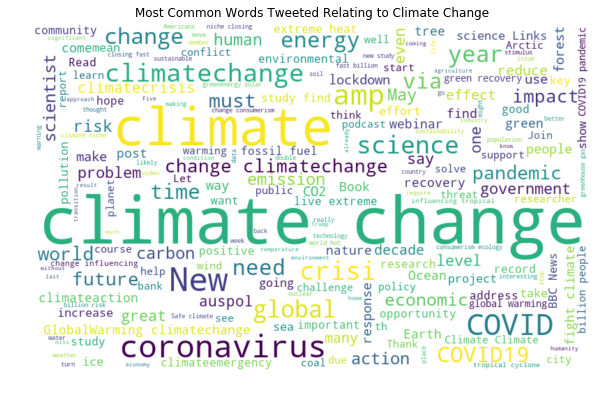

In [629]:
#This is a WordCloud of L_tweets

tweet_words = ' '.join([text for text in Polarity_of_Tweets['L_Tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(background_color = 'white', width=800, height=500, random_state=21, max_font_size=110).generate(tweet_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common Words Tweeted Relating to Climate Change")
plt.show()

In [631]:

# Will take two different apporoaches to see which one works better. I think BOW will work better
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

Bag_of_Words = bow_vectorizer.fit_transform(Polarity_of_Tweets['L_Tweet'])
Bag_of_Words

<743x930 sparse matrix of type '<class 'numpy.int64'>'
	with 5277 stored elements in Compressed Sparse Row format>

In [632]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
TF_IDF = tfidf_vectorizer.fit_transform(Polarity_of_Tweets['L_Tweet'])
TF_IDF

<743x930 sparse matrix of type '<class 'numpy.float64'>'
	with 5277 stored elements in Compressed Sparse Row format>

In [692]:
print(Polarity_of_Tweets.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 6 columns):
tweet             743 non-null object
Polarity          743 non-null object
Polarity_Value    743 non-null int64
TokenizedTweet    743 non-null object
cleaned_tweets    743 non-null object
L_Tweet           743 non-null object
dtypes: int64(1), object(5)
memory usage: 34.9+ KB
None


In [693]:
#Splitting this between traning and test set for BAG OF WORDS
train_bow = Bag_of_Words[:743,:]
test_bow = Bag_of_Words[743:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, Polarity_of_Tweets['Polarity_Value'], random_state=42, test_size=0.3)

#Spliting this between traning and test set for TF-IDF
train_tfidf = TF_IDF[:743,:]
test_tfidf = TF_IDF[743:,:]


# splitting data into training and validation set
xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]



In [694]:

#Using a logistical regression model for both.
lreg = LogisticRegression()
#Traning the models
lreg.fit(xtrain_bow, ytrain) 

lreg.fit(xtrain_tfidf, ytrain)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [695]:
#Bag of words
prediction = lreg.predict_proba(xvalid_bow) 
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)


print('Bag of Words Precision Score: ',precision_score(yvalid, prediction_int, average="macro"))
print('Bag of Words Recall Score: ',recall_score(yvalid, prediction_int, average="macro"))    

BOW_F1_SCORE = f1_score(yvalid, prediction_int)

#Calculating f1 score of the model. A F1 score of .93 is very good. This model is behaving perfectly
print('Bag of Words F1 Score is: ', BOW_F1_SCORE)


Bag of Words Precision Score:  0.9369369369369369
Bag of Words Recall Score:  0.5172413793103449
Bag of Words F1 Score is:  0.9326923076923077


In [696]:
#TF-IDF
from sklearn.metrics import precision_score, recall_score
prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

TF_IDF_F1_SCORE = f1_score(yvalid, prediction_int)
print('TF-IDF Precision Score: ',precision_score(yvalid, prediction_int, average="macro"))
print('TF-IDF Recall Score: ',recall_score(yvalid, prediction_int, average="macro"))    

#Calculating f1 score of the model. A F1 score of .93 is very good. This model is behaving perfectly, although less accurate 
#than bag of words

print('TF_IDF F1 Score is:',TF_IDF_F1_SCORE)


TF-IDF Precision Score:  0.4349775784753363
TF-IDF Recall Score:  0.5
TF_IDF F1 Score is: 0.9304556354916067


/Users/rashijammi/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [611]:


#Creating a new dataframe: 

EDA = Polarity_of_Tweets.copy()

In [613]:
EDA

,tweet,Polarity,Polarity_Value,TokenizedTweet,cleaned_tweets,L_Tweet
0,True Climate change is an existential threat a...,Positive,1,"[True, Climate, change, is, an, existential, t...","[True, Climate, change, existential, threat, d...",True Climate change existential threat decarbo...
1,Mr Macklem will have to address the bank s 10 ...,Positive,1,"[Mr, Macklem, will, have, to, address, the, ba...","[Mr, Macklem, address, bank, 10, billion, corp...",Mr Macklem address bank 10 billion corporate b...
2,Human responses to climate and ecosystem chang...,Positive,1,"[Human, responses, to, climate, and, ecosystem...","[Human, responses, climate, ecosystem, change,...",Human response climate ecosystem change ancien...
3,A make or break moment for our action on Clima...,Positive,1,"[A, make, or, break, moment, for, our, action,...","[A, make, break, moment, action, Climate, ActO...",A make break moment action Climate ActOnClimate
4,Even so CO2 levels are still going up The effo...,Positive,1,"[Even, so, CO2, levels, are, still, going, up,...","[Even, CO2, levels, still, going, The, efforts...",Even CO2 level still going The effort need tit...
5,New Scientist Climate change has already made ...,Positive,1,"[New, Scientist, Climate, change, has, already...","[New, Scientist, Climate, change, already, mad...",New Scientist Climate change already made part...
6,TOMORROW Don t forget to register at 1pm ET as...,Positive,1,"[TOMORROW, Don, t, forget, to, register, at, 1...","[TOMORROW, Don, forget, register, 1pm, ET, pan...",TOMORROW Don forget register 1pm ET panelist d...
7,Scientists pondering forests of the future mee...,Positive,1,"[Scientists, pondering, forests, of, the, futu...","[Scientists, pondering, forests, future, meeti...",Scientists pondering forest future meeting cha...
8,New from me Incitec Pivot avoids multi million...,Positive,1,"[New, from, me, Incitec, Pivot, avoids, multi,...","[New, Incitec, Pivot, avoids, multi, million, ...",New Incitec Pivot avoids multi million dollar ...
9,Climate Climate Change ClimateChange Environme...,Positive,1,"[Climate, Climate, Change, ClimateChange, Envi...","[Climate, Climate, Change, ClimateChange, Envi...",Climate Climate Change ClimateChange Environme...


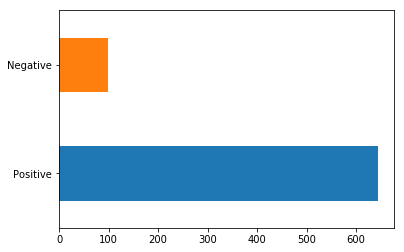

In [617]:
EDA['Polarity'].value_counts().plot(kind='barh')

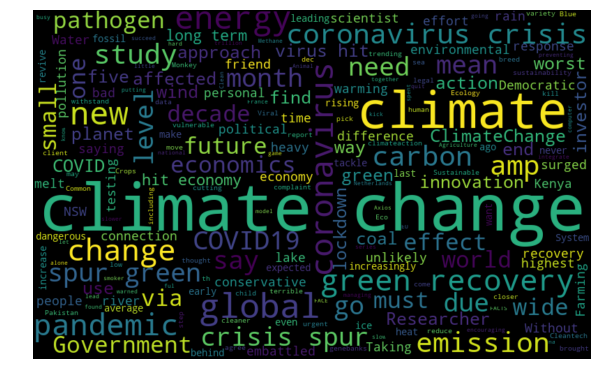

In [676]:
negative_words = ' '.join([text for text in EDA['L_Tweet'][EDA['Polarity_Value'] == 0]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

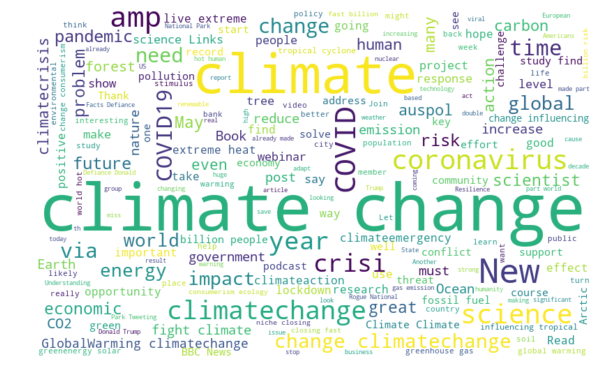

In [675]:
positive_words = ' '.join([text for text in EDA['L_Tweet'][EDA['Polarity_Value'] == 1]])
wordcloud = WordCloud(background_color='white', width=800, height=500,
random_state=21, max_font_size=110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()